In [52]:
import pandas as pd
import numpy as np
import json
import re


from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


pd.reset_option('max_colwidth')



In [53]:
df = pd.read_excel(r'c:\matproje\matsiklar (1).xlsx')

In [54]:
counts = df['Babanizin meslegi nedir? (Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)'].value_counts()
counts

a       40
e       31
d       30
c       28
e, a     1
Name: Babanizin meslegi nedir? (Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin), dtype: int64

Effects of Haaving an Engineering Family Member


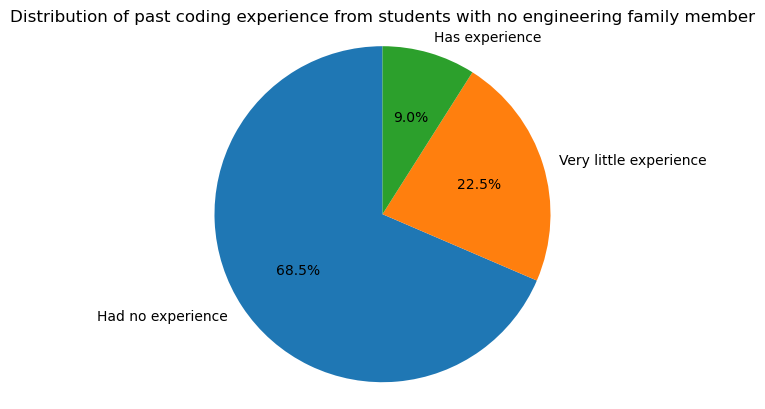

In [55]:

df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'] = df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].replace({'a': 'Had no experience', 'b': 'Very little experience', 'c': 'Has experience'})

filtered_data = df[df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'] == 'b']

counts = filtered_data['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of past coding experience from students with no engineering family member')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


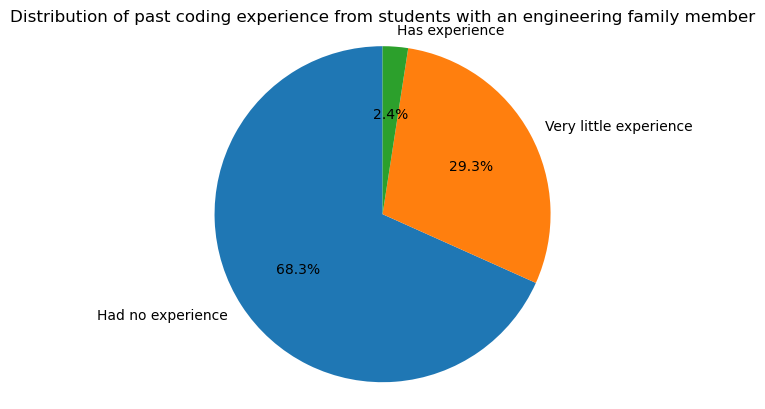

In [56]:




filtered_data = df[df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'] == 'a']
df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'] = df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].replace({'a': 'Had no experience', 'b': 'Very little experience', 'c': 'Has experience'})
counts = filtered_data['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of past coding experience from students with an engineering family member')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [57]:

df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'] = df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].replace({'a': 'Had no experience', 'b': 'Very little experience', 'c': 'Has experience'})


contingency_table = pd.crosstab(df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'], df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 2.2662888161516386
P-value: 0.3220191033331856
Degrees of freedom: 2
Expected frequencies:
[[28.06923077  2.83846154 10.09230769]
 [60.93076923  6.16153846 21.90769231]]


In [58]:
contingency_table

universiteye girmeden önce kodlama deneyimleriniz oldu mu?,Had no experience,Has experience,Very little experience
Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?,,,
a,28,1,12
b,61,8,20


Contribution of Mathematics Engineering to Personal and Professional Development

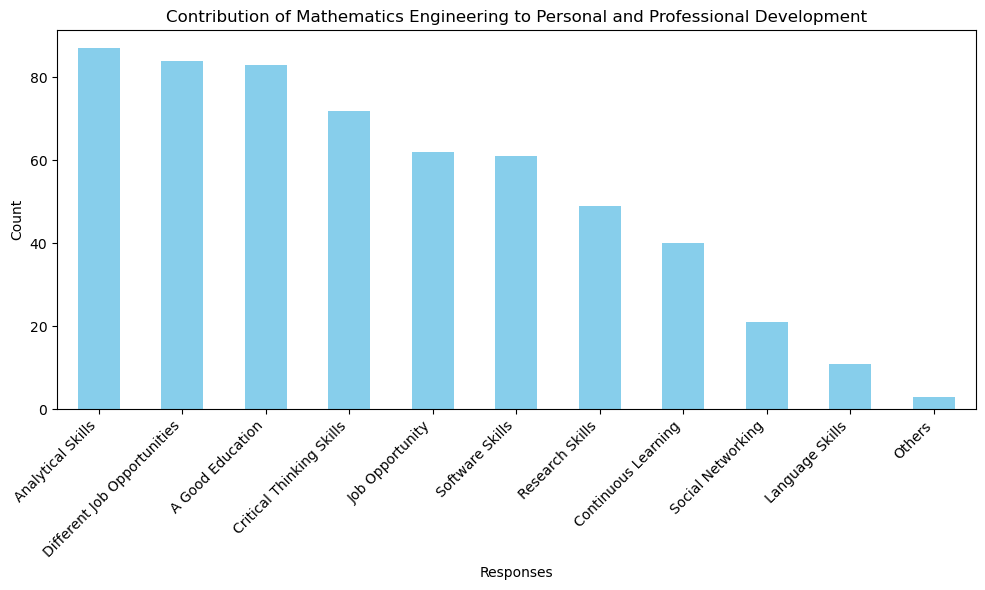

In [59]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'A Good Education',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Different Job Opportunities',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Others'
}
responses = df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?'].str.split(',').explode().str.strip()

responses = responses[responses != '']

responses = responses.map(response_mapping)
answer_counts = responses.value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
answer_counts.plot(kind='bar', color='skyblue')
plt.title("Contribution of Mathematics Engineering to Personal and Professional Development")
plt.xlabel("Responses")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

When choosing a department, what is the most important factor that makes mathematical engineering stand out compared to other departments?

In [60]:
df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?'] = df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?'].str.split(',')



In [61]:
df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?']

0                                       [a]
1                                   [b,  a]
2                              [c, e, g, d]
3                       [f,  a,  e,  i,  h]
4                   [b,  c,  f,  a,  g,  d]
                       ...                 
125    [b,  j,  f,  a,   d,  h,  i,  e,  g]
126                     [e,  g,  i,  h,  g]
127             [b,  j,  c,  f,  g,  d,  h]
128                            [f,  a,  g ]
129                         [b,  j,  c,  a]
Name: Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?, Length: 130, dtype: object

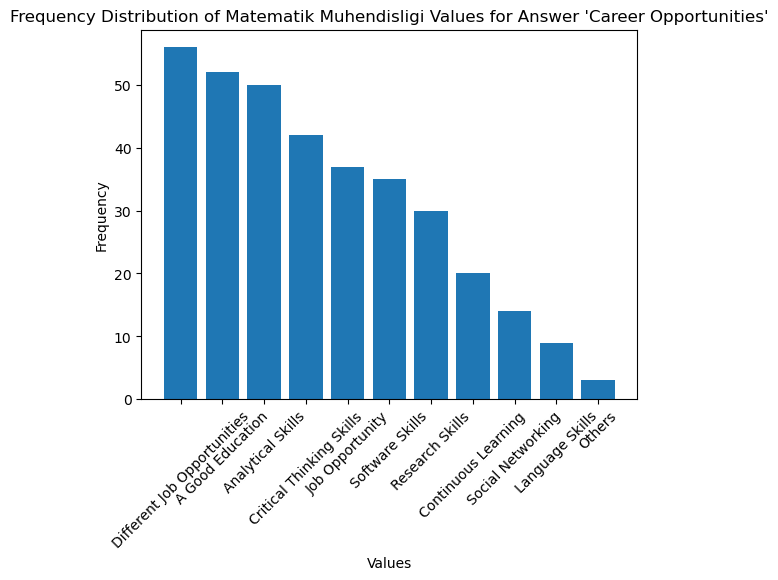

In [62]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'A Good Education',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Different Job Opportunities',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Others'
}



filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'a']

flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

mapped_values = [response_mapping[val] for val in flattened_values]
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Career Opportunities'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

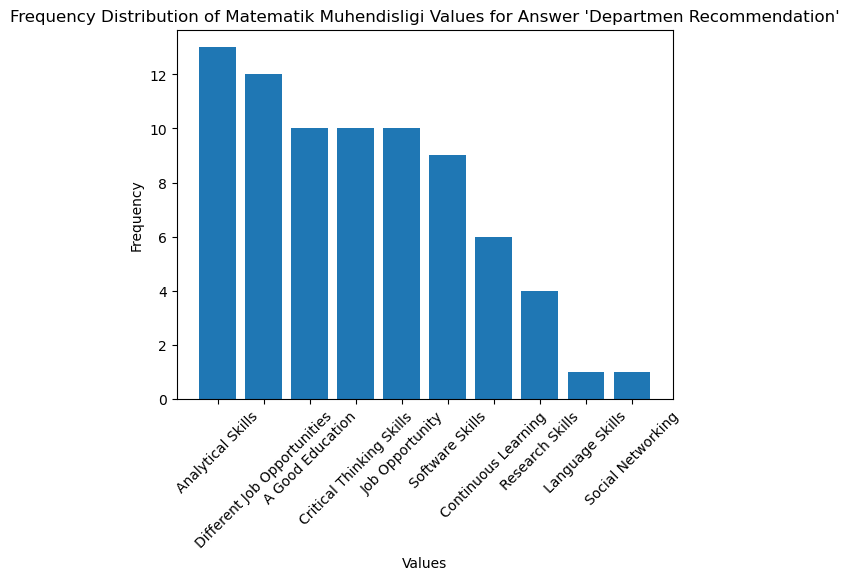

In [63]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'A Good Education',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Different Job Opportunities',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Others'
}


filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'b']

flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]


mapped_values = [response_mapping[val] for val in flattened_values]
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Departmen Recommendation'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

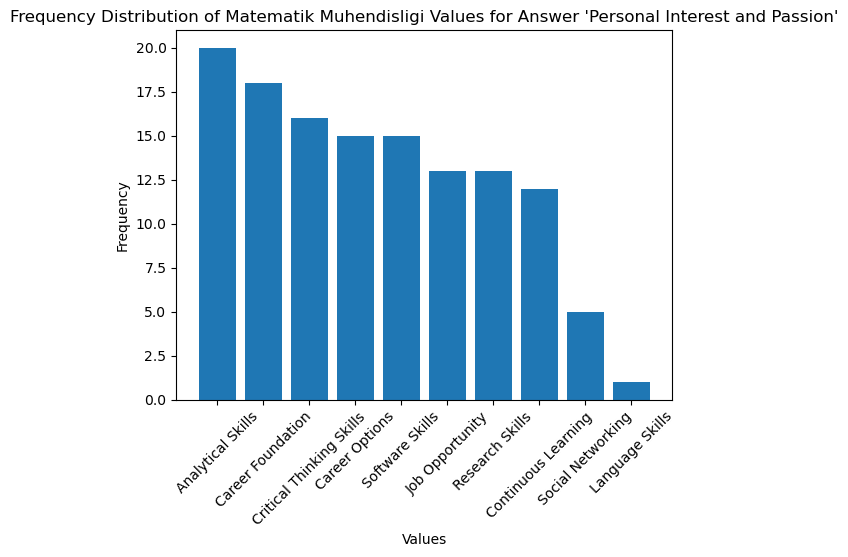

In [64]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}



filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'c']

flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

mapped_values = [response_mapping[val] for val in flattened_values]

value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Personal Interest and Passion'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

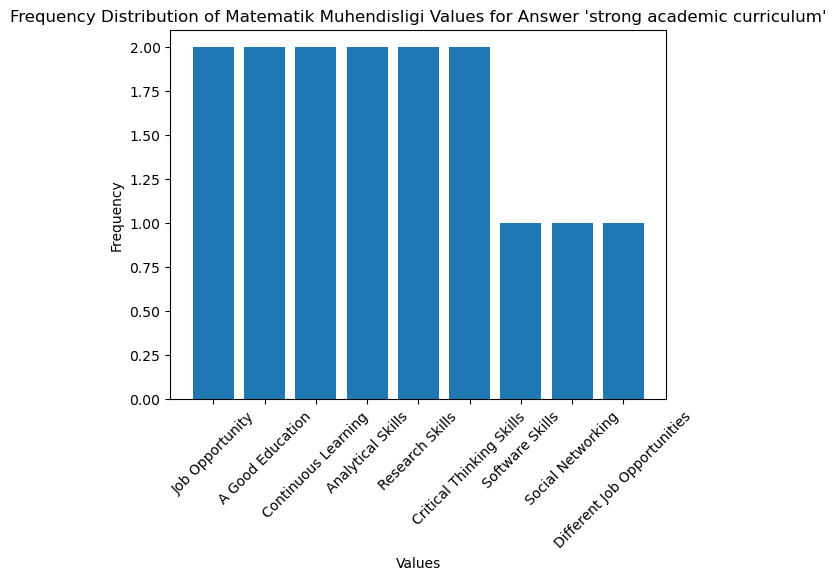

In [65]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'A Good Education',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Different Job Opportunities',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Others'
}



filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'd']
flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

mapped_values = [response_mapping[val] for val in flattened_values]

value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'strong academic curriculum'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

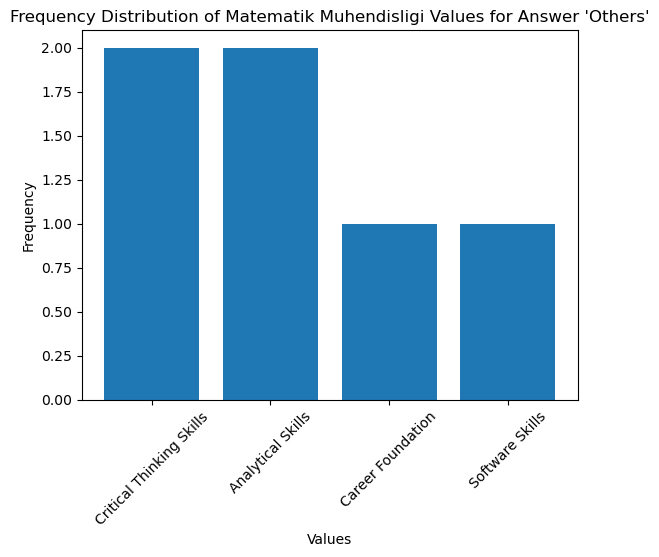

In [66]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}



filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'e']

flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

mapped_values = [response_mapping[val] for val in flattened_values]

value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Others'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Istanbul DIsi Ogrenciler

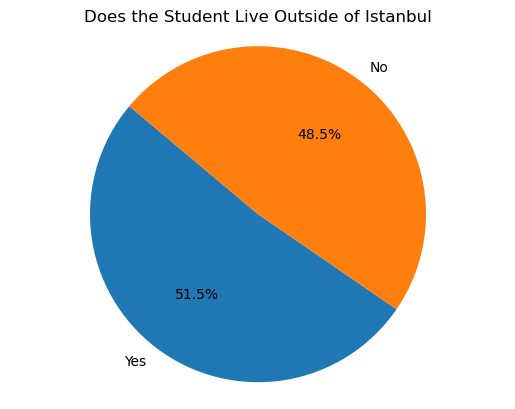

In [67]:
response_mapping = {'a': 'Yes', 'b': 'No'}
df["Aileniz istanbul disinda mi yasiyor?"] = df["Aileniz istanbul disinda mi yasiyor?"].map(response_mapping)

response_counts = df["Aileniz istanbul disinda mi yasiyor?"].value_counts()

# Plot the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Does the Student Live Outside of Istanbul")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Distrubution of Participating or Planning to Participate in Research Projects or Internships During University Years

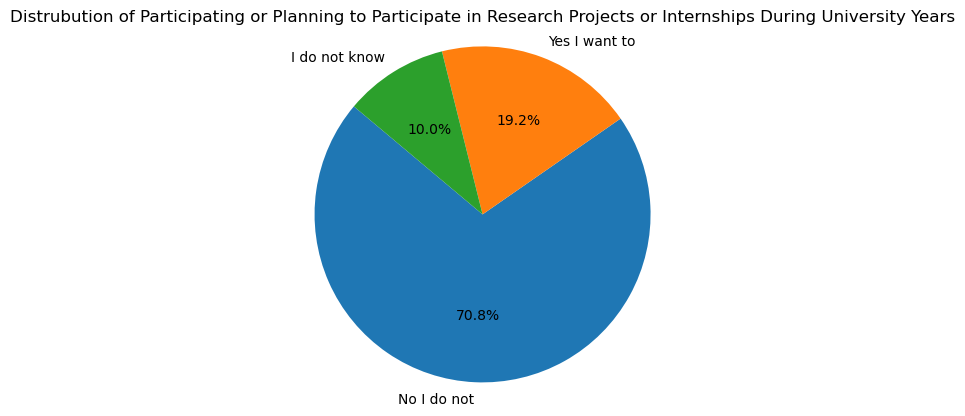

In [68]:

response_mapping = {'a': 'I do not know', 'b': 'No I do not', 'c': 'Yes I want to'}
df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"] = df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"].map(response_mapping)

response_counts = df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"].value_counts()

# Plot the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distrubution of Participating or Planning to Participate in Research Projects or Internships During University Years")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Motivation of Students that do or do not want to Participate or Plan to Participate in Research Projects or Internships During University Years

In [69]:



df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"] = df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"].str.split(',')


In [70]:
df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"]

0                  [a]
1                  [b]
2                  [d]
3                  [d]
4      [a,  c,  b,  e]
            ...       
125                [d]
126                [a]
127                [d]
128                [d]
129                [e]
Name: Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin), Length: 130, dtype: object

In [71]:
df['Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)']

0                  [a]
1                  [b]
2                  [d]
3                  [d]
4      [a,  c,  b,  e]
            ...       
125                [d]
126                [a]
127                [d]
128                [d]
129                [e]
Name: Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin), Length: 130, dtype: object

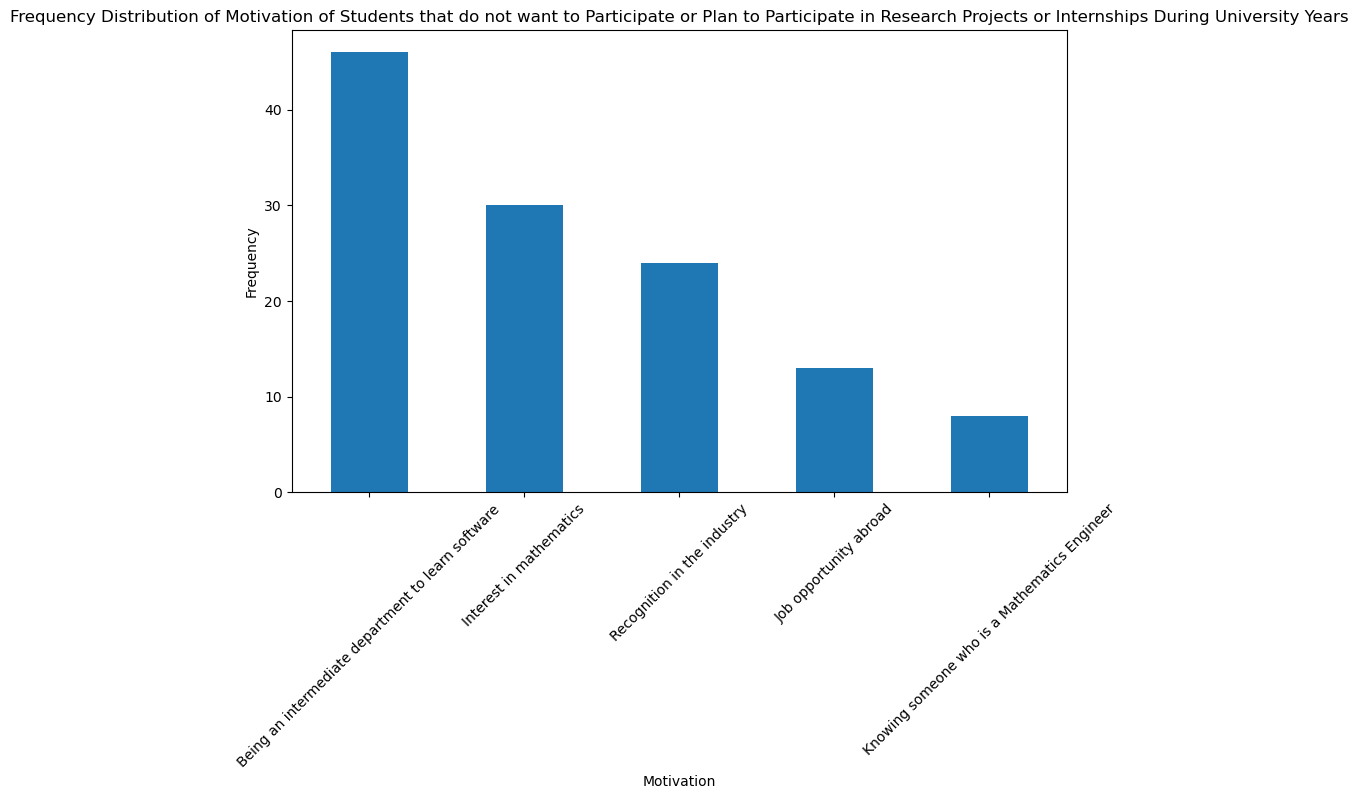

In [72]:
response_mapping = {
    'a': 'Job opportunity abroad',
    'b': 'Recognition in the industry',
    'c': 'Interest in mathematics',
    'd': 'Being an intermediate department to learn software',
    'e': 'Knowing someone who is a Mathematics Engineer'
}


filtered_df = df[df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"] == 'No I do not']
flattened_values = [item.strip() for sublist in filtered_df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"] for item in sublist if item.strip()]

mapped_values = [response_mapping[val] for val in flattened_values]

value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel("Motivation")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Motivation of Students that do not want to Participate or Plan to Participate in Research Projects or Internships During University Years")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

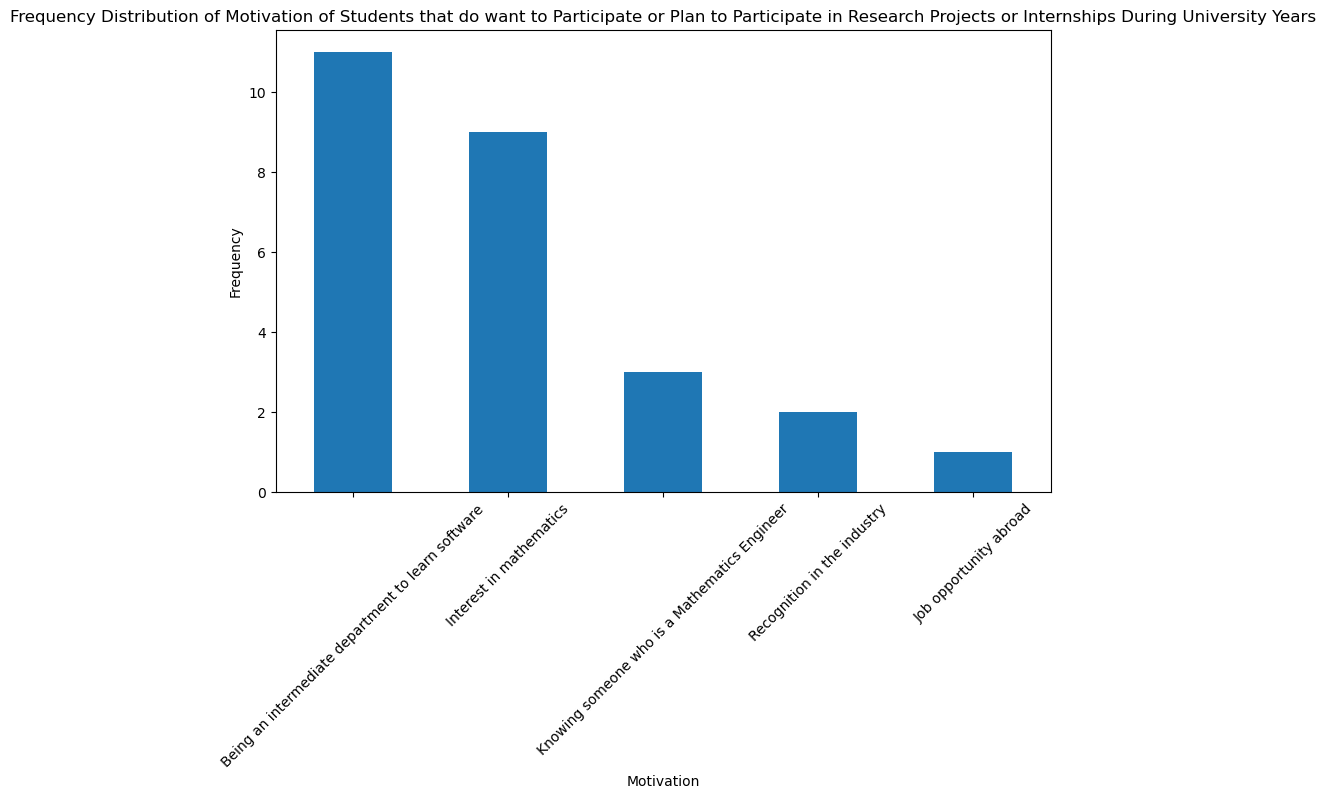

In [73]:
response_mapping = {
    'a': 'Job opportunity abroad',
    'b': 'Recognition in the industry',
    'c': 'Interest in mathematics',
    'd': 'Being an intermediate department to learn software',
    'e': 'Knowing someone who is a Mathematics Engineer'
}

filtered_df = df[df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"] == 'Yes I want to']
flattened_values = [item.strip() for sublist in filtered_df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"] for item in sublist if item.strip()]

mapped_values = [response_mapping[val] for val in flattened_values]
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel("Motivation")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Motivation of Students that do want to Participate or Plan to Participate in Research Projects or Internships During University Years")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Why students choose this field

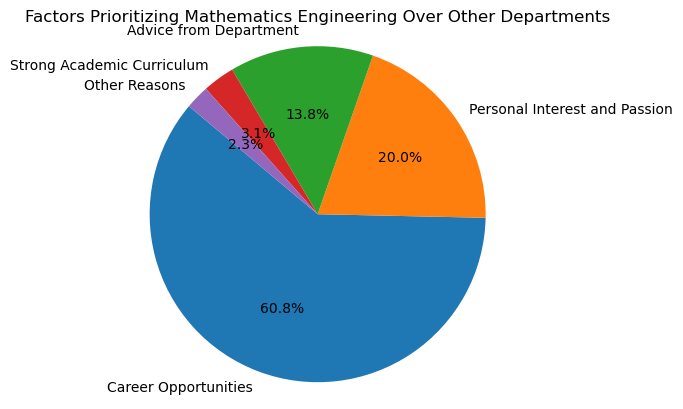

In [74]:


response_mapping = {
    'a': 'Career Opportunities',
    'b': 'Advice from Department',
    'c': 'Personal Interest and Passion',
    'd': 'Strong Academic Curriculum',
    'e': 'Other Reasons'
}





df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] = df[
    "Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"
].apply(lambda x: [response_mapping[response.strip()] for response in x.split(',')])

mapped_responses = [response for sublist in df[
    "Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"
] for response in sublist]


# Count the occurrences of each mapped response
response_counts = pd.Series(mapped_responses).value_counts()
# Plot the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Factors Prioritizing Mathematics Engineering Over Other Departments")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Students' 2'nd choice reason of studying

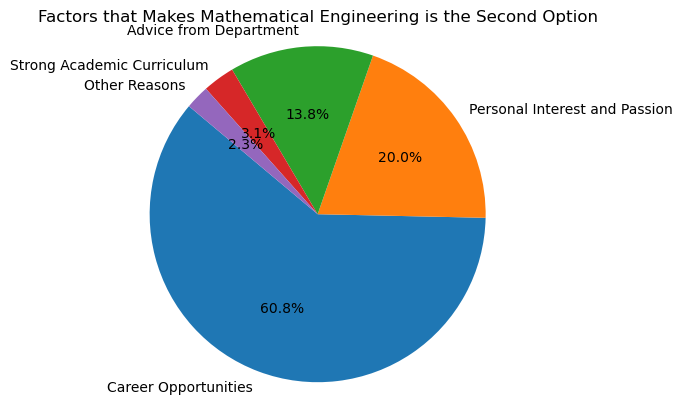

In [75]:

df = pd.read_excel(r'c:\matproje\matsiklar (1).xlsx')
response_mapping = {
    'a': 'Career Opportunities',
    'b': 'Advice from Department',
    'c': 'Personal Interest and Passion',
    'd': 'Strong Academic Curriculum',
    'e': 'Other Reasons'
}

filtered_data = df[df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'] == 'a']

response_counts2 = filtered_data[
    "Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"
].apply(lambda x: [response_mapping[response] for response in x.split(',') if response_mapping.get(response)])

mapped_responses = [response for sublist in response_counts2 for response in sublist]


response_counts2 = pd.Series(mapped_responses).value_counts()

# Plot the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Factors that Makes Mathematical Engineering is the Second Option")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



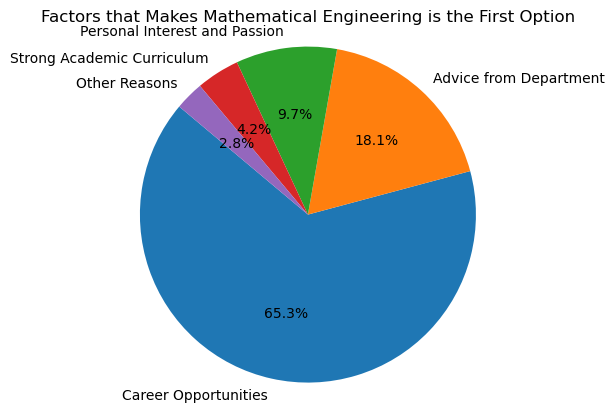

In [76]:

df = pd.read_excel(r'c:\matproje\matsiklar (1).xlsx')
response_mapping = {
    'a': 'Career Opportunities',
    'b': 'Advice from Department',
    'c': 'Personal Interest and Passion',
    'd': 'Strong Academic Curriculum',
    'e': 'Other Reasons'
}

filtered_data = df[df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'] == 'b']

response_counts = filtered_data[
    "Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"
].apply(lambda x: [response_mapping[response] for response in x.split(',') if response_mapping.get(response)])

mapped_responses = [response for sublist in response_counts for response in sublist]

response_counts = pd.Series(mapped_responses).value_counts()

# Plot the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Factors that Makes Mathematical Engineering is the First Option")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [77]:
FirstOption=response_counts["Career Opportunities"]
SecondOption=response_counts2["Career Opportunities"]
print("People who chose first option:",FirstOption)
print("People who chose second option:",SecondOption)


People who chose first option: 47
People who chose second option: 32


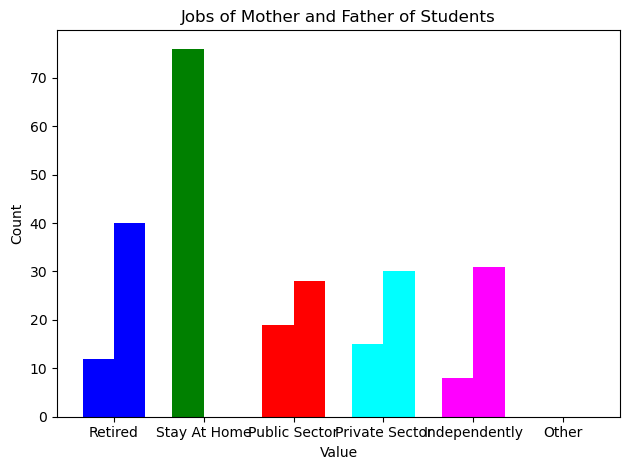

In [78]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

value_labels = {
    'a': 'Retired',
    'b': 'Stay At Home',
    'c': 'Public Sector',
    'd': 'Private Sector',
    'e': 'Independently',
    'f': 'Other'
}

fig, ax = plt.subplots()


bar_width = 0.35
for i, (value, label) in enumerate(value_labels.items()):
    annenizin_counts = df["Annenizin meslegi nedir? (Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"].value_counts().get(value, 0)
    babanizin_counts = df["Babanizin meslegi nedir? (Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"].value_counts().get(value, 0)
    ax.bar([i - bar_width/2, i + bar_width/2], [annenizin_counts, babanizin_counts], bar_width, label=label, color=colors[i])

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Jobs of Mother and Father of Students')
ax.set_xticks(range(len(value_labels)))
ax.set_xticklabels([label for _, label in value_labels.items()])


# Show plot
plt.tight_layout()
plt.show()

Chosing Math Eng WIth WIthout Engineer Family Member

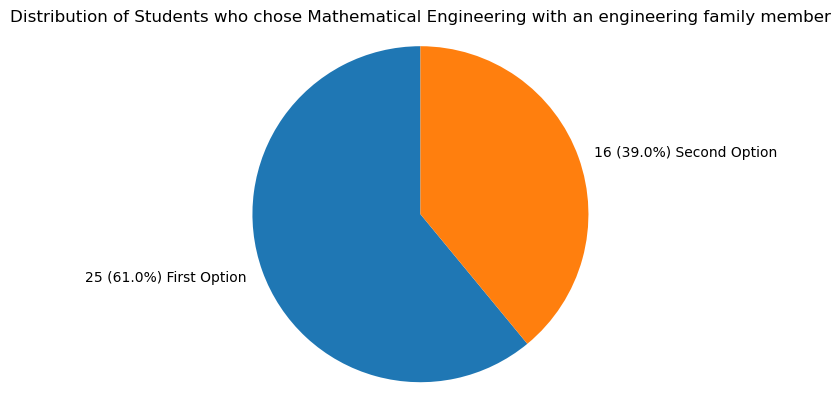

In [83]:
filtered_data = df[df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'] == 'a']
df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'] = df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].replace({'a': 'Second Option', 'b': 'First Option'})
counts = filtered_data['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=['{} ({:.1f}%) {}'.format(count, count/sum(counts)*100, label) for count, label in zip(counts, counts.index)], startangle=90)
plt.title('Distribution of Students who chose Mathematical Engineering with an engineering family member')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

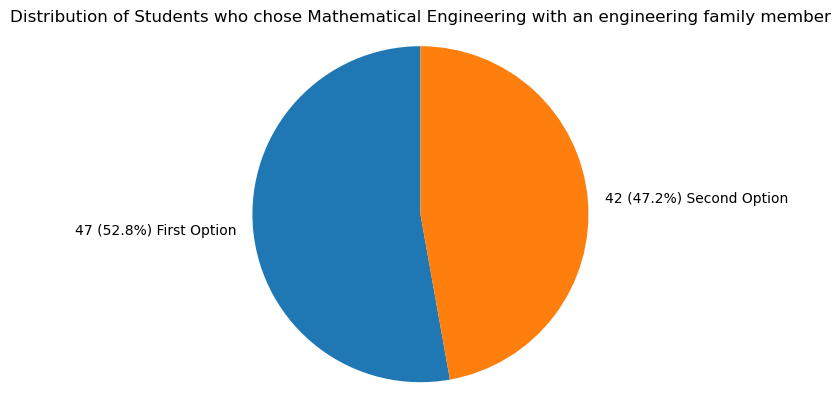

In [85]:
filtered_data = df[df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'] == 'b']
df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'] = df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].replace({'a': 'Second Option', 'b': 'First Option'})
counts = filtered_data['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=['{} ({:.1f}%) {}'.format(count, count/sum(counts)*100, label) for count, label in zip(counts, counts.index)], startangle=90)
plt.title('Distribution of Students who chose Mathematical Engineering without an engineering family member')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
filtered_data = df[df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'] == 'b']
df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'] = df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].replace({'a': 'Second Option', 'b': 'First Option'})
counts = filtered_data['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=['{} ({:.1f}%) {}'.format(count, count/sum(counts)*100, label) for count, label in zip(counts, counts.index)], startangle=90)
plt.title('Distribution of Students who chose Mathematical Engineering without an engineering family member')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

a b d

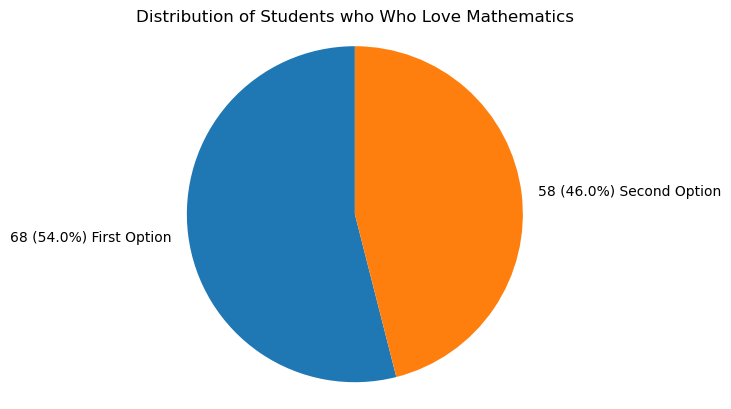

In [91]:
filtered_data = df[df['Matematiğe ilginizi ve yetenek seviyenizi nasil deherlendirirsiniz?'].isin(['a', 'b', 'd'])]
df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'] = df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].replace({'a': 'Second Option', 'b': 'First Option'})
counts = filtered_data['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=['{} ({:.1f}%) {}'.format(count, count/sum(counts)*100, label) for count, label in zip(counts, counts.index)], startangle=90)
plt.title('Distribution of Students who Who Love Mathematics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

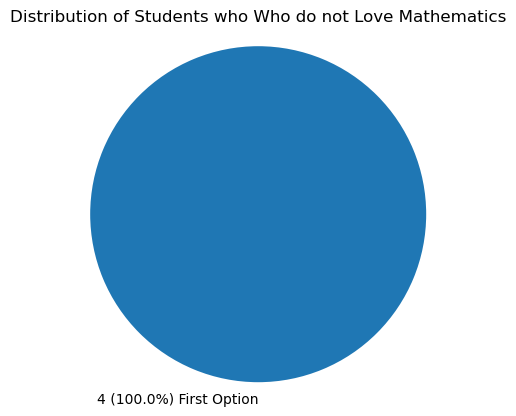

In [92]:
filtered_data = df[df['Matematiğe ilginizi ve yetenek seviyenizi nasil deherlendirirsiniz?'].isin(['e', 'c'])]
df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'] = df['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].replace({'a': 'Second Option', 'b': 'First Option'})
counts = filtered_data['Daha iyi bir puan alsaydiniz yine de Matematik Mühendislihi Bölümünü secer miydiniz?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=['{} ({:.1f}%) {}'.format(count, count/sum(counts)*100, label) for count, label in zip(counts, counts.index)], startangle=90)
plt.title('Distribution of Students who Who do not Love Mathematics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Years of knowing math engineering

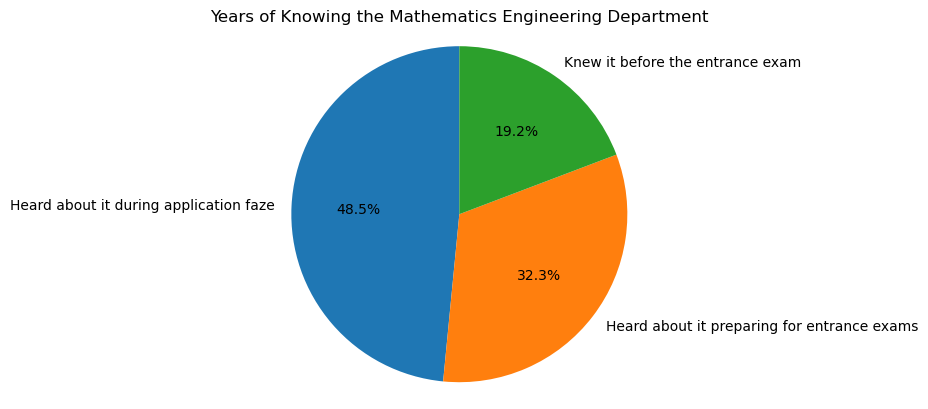

In [98]:

# Filter the data for the specified column values
filtered_data = df[df['Matematik Muhendisligi Bolumunu kac yildir biliyorsunuz?'].isin(['a', 'b', 'c'])]

# Count the occurrences of each response
counts = filtered_data['Matematik Muhendisligi Bolumunu kac yildir biliyorsunuz?'].value_counts()

# Replace the labels with their descriptions
labels = {
    'a': 'Knew it before the entrance exam',
    'b': 'Heard about it during application faze',
    'c': 'Heard about it preparing for entrance exams'
}

# Plot the pie chart
plt.pie(counts, labels=[labels[label] for label in counts.index], autopct='%1.1f%%', startangle=90)
plt.title('Years of Knowing the Mathematics Engineering Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Book reading

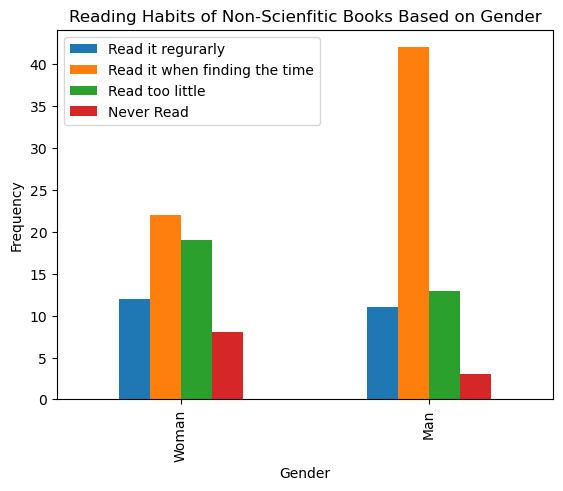

In [105]:
gender_labels = {'a': 'Woman', 'b': 'Man'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Cinsiyetiniz nedir?'].isin(['a', 'b'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Cinsiyetiniz nedir?', 'fsel olmayan kitap/dergileri okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Non-Scienfitic Books Based on Gender')
plt.show()

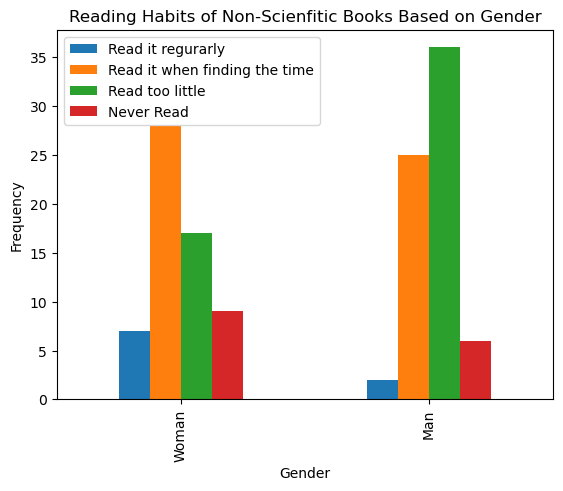

In [106]:
gender_labels = {'a': 'Woman', 'b': 'Man'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Cinsiyetiniz nedir?'].isin(['a', 'b'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Cinsiyetiniz nedir?', 'fsel kitap/dergi okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Scienfitic Books Based on Gender')
plt.show()

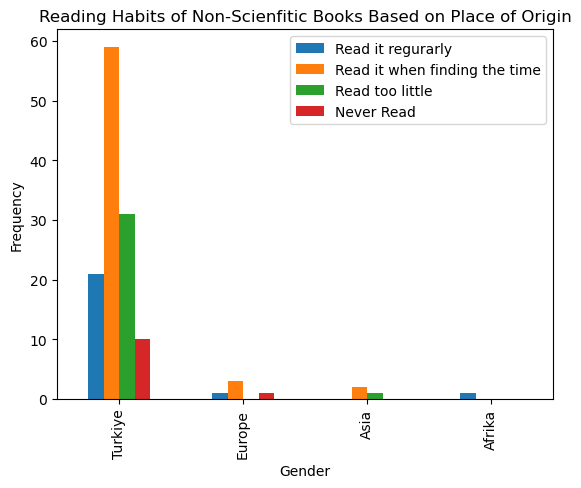

In [117]:
gender_labels = {'a': 'Turkiye', 'b': 'Europe', 'c': 'Asia', 'd': 'Afrika'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Kokeniniz neresi?'].isin(['a', 'b','c','d'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Kokeniniz neresi?', 'fsel olmayan kitap/dergileri okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Non-Scienfitic Books Based on Place of Origin')
plt.show()

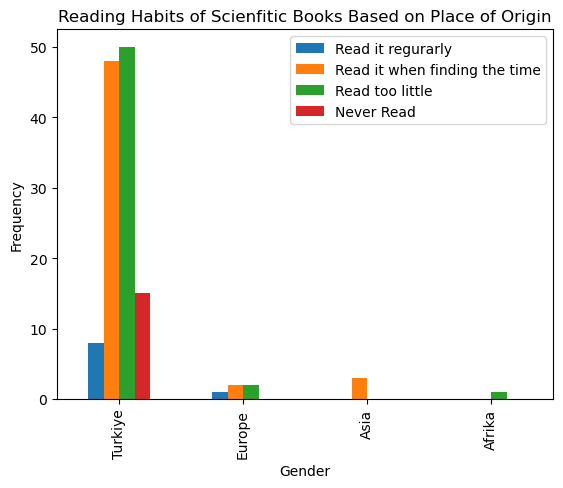

In [116]:
gender_labels = {'a': 'Turkiye', 'b': 'Europe', 'c': 'Asia', 'd': 'Afrika'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Kokeniniz neresi?'].isin(['a', 'b','c','d'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Kokeniniz neresi?', 'fsel kitap/dergi okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Scienfitic Books Based on Place of Origin')
plt.show()

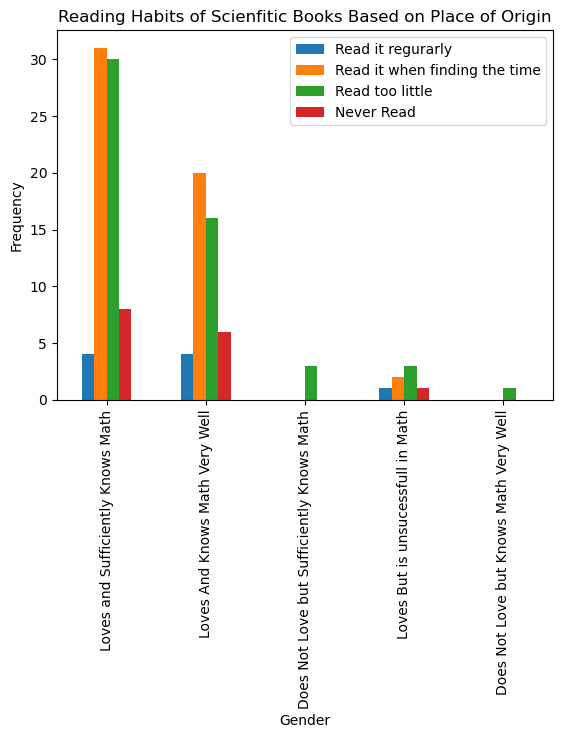

In [111]:
gender_labels = {'a': 'Loves and Sufficiently Knows Math', 'b': 'Loves And Knows Math Very Well', 'c': 'Does Not Love but Sufficiently Knows Math', 'd': 'Loves But is unsucessfull in Math', 'e': 'Does Not Love but Knows Math Very Well'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Matematiğe ilginizi ve yetenek seviyenizi nasil deherlendirirsiniz?'].isin(['a', 'b','c','d','e'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Matematiğe ilginizi ve yetenek seviyenizi nasil deherlendirirsiniz?', 'fsel kitap/dergi okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Scienfitic Books Based on Math Skills')
plt.show()

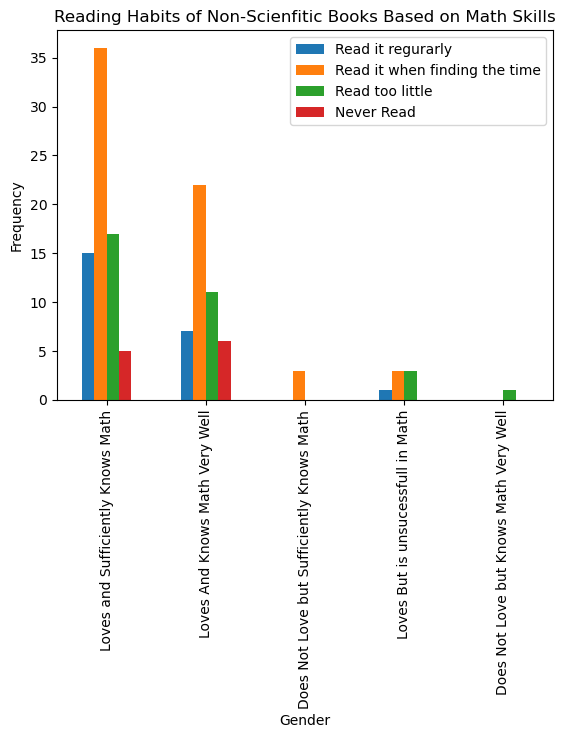

In [115]:
gender_labels = {'a': 'Loves and Sufficiently Knows Math', 'b': 'Loves And Knows Math Very Well', 'c': 'Does Not Love but Sufficiently Knows Math', 'd': 'Loves But is unsucessfull in Math', 'e': 'Does Not Love but Knows Math Very Well'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Matematiğe ilginizi ve yetenek seviyenizi nasil deherlendirirsiniz?'].isin(['a', 'b','c','d','e'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Matematiğe ilginizi ve yetenek seviyenizi nasil deherlendirirsiniz?', 'fsel olmayan kitap/dergileri okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Non-Scienfitic Books Based on Math Skills')
plt.show()

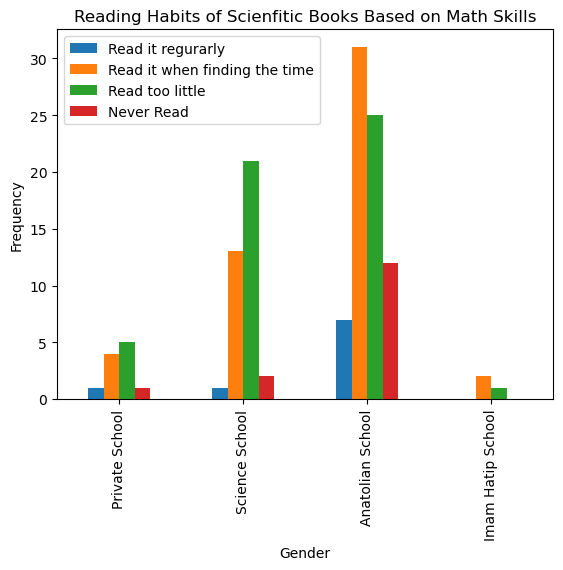

In [118]:
gender_labels = {'a': 'Private School', 'b': 'Science School', 'c': 'Anatolian School', 'd': 'Imam Hatip School'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Hangi tur liseyi bitirdiniz?'].isin(['a', 'b','c','d'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Hangi tur liseyi bitirdiniz?', 'fsel kitap/dergi okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Scienfitic Books Based on High School')
plt.show()

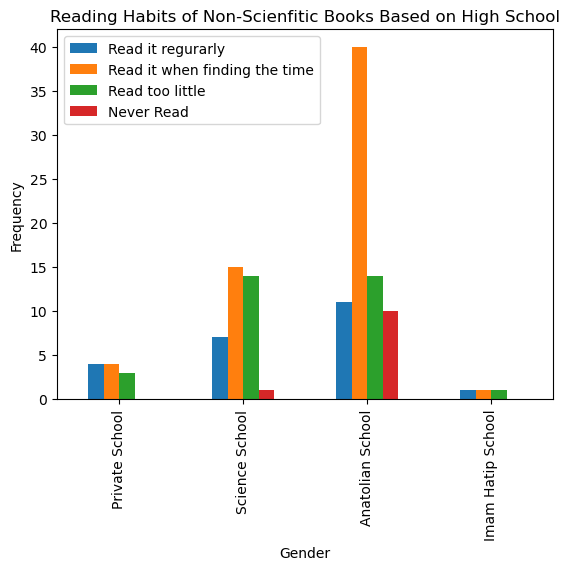

In [119]:
gender_labels = {'a': 'Private School', 'b': 'Science School', 'c': 'Anatolian School', 'd': 'Imam Hatip School'}
reading_labels = {'a': 'Read it regurarly', 'b': 'Read it when finding the time', 'c': 'Read too little', 'd': 'Never Read'}

filtered_data = df[df['Hangi tur liseyi bitirdiniz?'].isin(['a', 'b','c','d'])]

# Count the occurrences of each reading frequency for each gender
counts = filtered_data.groupby(['Hangi tur liseyi bitirdiniz?', 'fsel olmayan kitap/dergileri okuma sikliginiz nedir?']).size().unstack(fill_value=0)

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(range(len(gender_labels)), [gender_labels[label] for label in counts.index])
plt.legend([reading_labels[label] for label in counts.columns])
plt.title('Reading Habits of Non-Scienfitic Books Based on High School')
plt.show()